# Adult Kaggle dataset analysis and story telling

The dataset named `adult.csv` is downloaded from Kaggle. 

An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.

This is a widely cited KNN dataset. I encountered it during my course, and I wish to share it here because it is a good starter example for data pre-processing and machine learning practices.

Fields
The dataset contains 16 columns
Target filed: Income
-- The income is divide into two classes: 50K
Number of attributes: 14
-- These are the demographics and other features to describe a person

We can explore the possibility in predicting income level based on the individual’s personal information.

Acknowledgements
This dataset named “adult” is found in the UCI machine learning repository
http://www.cs.toronto.edu/~delve/data/adult/desc.html

The detailed description on the dataset can be found in the original UCI documentation
http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html

In what follows below is a list of exercise steps we took to choose a dataset and analyze it.

__Exercise Steps__

1. Select a dataset - any dataset! Make sure it's not too dirty, as this case study is 
about storytelling, not cleaning... :) 
2. Pick your audience: executive, technical, or non-technical; and adjust your tone 
accordingly. 
3. Take a look at the data: explore it. 
4. Think of a narrative, and pursue it. 
5. Give a 15 mins presentation to your mentor during your next call. 

__In your quest, you might need to ask a bunch of other questions, such as:__
- Can I count something interesting? 
- Can I find trends (e.g. high, low, increasing, decreasing, anomalies)? 
- Can I make a bar plot or a histogram? 
- Can I compare two related quantities? 
- Can I make a scatterplot? 
- Can I make a time-series plot? 
- Looking at the plots, what are some insights I can make? 
- Can I see any correlations? 
- Is there a hypothesis I can - and should - investigate further? 
- What other questions are the insights leading me to ask? 

## Load important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data Wrangling
### Load data

In [2]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
# get shape of data
df.shape

(48842, 15)

In [4]:
# What type of data do we have?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


The features are either of object or integer type

In [5]:
# Count missing values
df.isnull().sum()


age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

Theare are 0 null values in our dataset. However, looking at the output of df.head() we see that there are fetures with vvalues '?'. 

In [6]:
How many unique values do each of the feature columns have?

Object `have` not found.


In [ ]:
How many unique values do each of the feature columns have

In [7]:
# get number of unique values for each feature and sort in descending order.
df.nunique().sort_values(ascending=False)

fnlwgt             28523
capital-gain         123
capital-loss          99
hours-per-week        96
age                   74
native-country        42
educational-num       16
education             16
occupation            15
workclass              9
marital-status         7
relationship           6
race                   5
income                 2
gender                 2
dtype: int64

feature `fnlwgt` has the highest number of unique values. The smallest number of unique values for a given feature is 2. These features are `income` and `gender`.

In [8]:
# quik statistical audit of numerical features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [9]:
# list dataframe columns
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [10]:
# get count of values for object/categorical features
df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

feature `workclass` seems has 2799 number of `?` values! dropping `?` is not a good idea as it will affect quality of model prediction. We could however replace it with highest occuring value, i.e., the mode.

In [11]:
df['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [12]:
df['marital-status'].value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [13]:
df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [14]:
df['relationship'].value_counts()

Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

In [15]:
df['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

In [16]:
df['gender'].value_counts()

Male      32650
Female    16192
Name: gender, dtype: int64

In [17]:
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

Features containing `?` values are `workclass`, `occupation`, `native-country`. We might need to impute this value.

<AxesSubplot:xlabel='income', ylabel='count'>

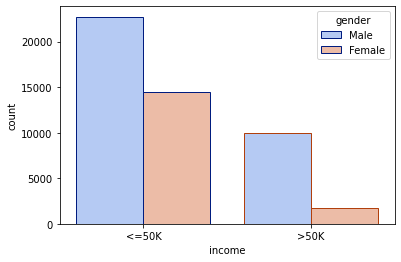

In [18]:
sns.countplot(df['income'],palette='coolwarm',hue='gender',data=df,edgecolor=sns.color_palette("dark", 3))

There are more males in the workforce. The ratio of males to females with income in the range less than 50k/year is greater than the ratio of males to females in the income range greater than 50k/year. It looks like there is some gender disparity in the high income range. 

### Income dependence on relationship status

<AxesSubplot:xlabel='income', ylabel='count'>

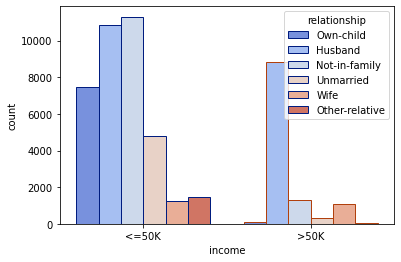

In [19]:
sns.countplot(df['income'],palette='coolwarm',hue='relationship',data=df,edgecolor=sns.color_palette("dark", 3))

The status of relationship has an impact on the income of an adult. People with one child make less money. The number of husbands making less money is comparable to the number of husbands in the high income range while most wifes have almost an equal opportunity of makine less or high income. For the most part, Unmarried people are in the low income 

### Effect of Marital status on adult income

<AxesSubplot:xlabel='income', ylabel='count'>

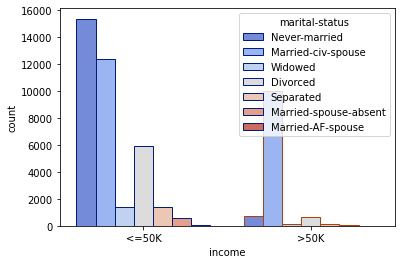

In [20]:
sns.countplot(df['income'],palette='coolwarm',hue='marital-status',data=df,edgecolor=sns.color_palette("dark", 3))

### Effect of race on adult income

<AxesSubplot:xlabel='income', ylabel='count'>

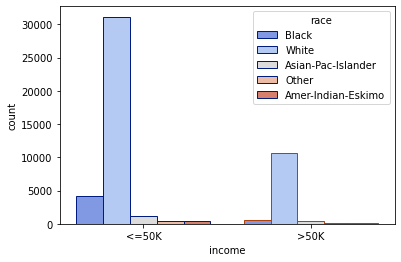

In [21]:
sns.countplot(df['income'],palette='coolwarm',hue='race',data=df,edgecolor=sns.color_palette("dark", 3))

### Effect of work class on adult income

<AxesSubplot:xlabel='income', ylabel='count'>

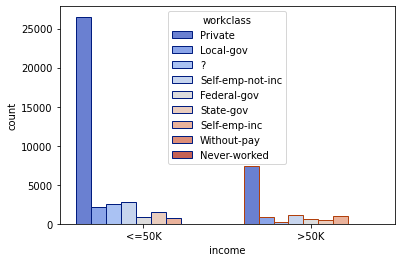

In [25]:
sns.countplot(df['income'],palette='coolwarm',hue='workclass',data=df,edgecolor=sns.color_palette("dark", 3))